In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# !pip install yfinance
import yfinance as yf
msft = yf.Ticker('MSFT')
msft_hist = msft.history(period='max')

In [3]:
msft_hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13,0.055783,0.063987,0.055783,0.061252,1031788800,0.0,0.0
1986-03-14,0.061252,0.064533,0.061252,0.063439,308160000,0.0,0.0
1986-03-17,0.063439,0.065080,0.063439,0.064533,133171200,0.0,0.0
1986-03-18,0.064533,0.065080,0.062345,0.062892,67766400,0.0,0.0
1986-03-19,0.062892,0.063439,0.061252,0.061799,47894400,0.0,0.0


<AxesSubplot:xlabel='Date'>

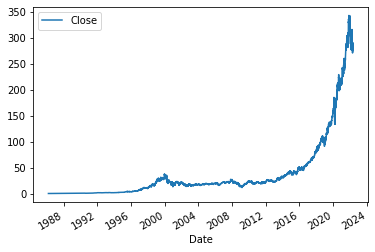

In [4]:
msft_hist.plot(y='Close', use_index=True)

In [5]:
data = msft_hist[['Close']]
data = data.rename(columns={'Close': 'Actual Close'})
data['Target'] = msft_hist['Close'].rolling(2).apply(lambda x: x.iloc[1] > x.iloc[0])

In [6]:
data.head()

,Actual Close,Target
Date,,
1986-03-13,0.061252,NaN
1986-03-14,0.063439,1.0
1986-03-17,0.064533,1.0
1986-03-18,0.062892,0.0
1986-03-19,0.061799,0.0


In [7]:
msft_prev = msft_hist.copy()
msft_prev = msft_prev.shift(1)
msft_prev.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-03-14,0.055783,0.063987,0.055783,0.061252,1.031789e+09,0.0,0.0
1986-03-17,0.061252,0.064533,0.061252,0.063439,3.081600e+08,0.0,0.0
1986-03-18,0.063439,0.065080,0.063439,0.064533,1.331712e+08,0.0,0.0
1986-03-19,0.064533,0.065080,0.062345,0.062892,6.776640e+07,0.0,0.0


In [8]:
predictors = ['Close', 'High', 'Low', 'Open', 'Volume']
data = data.join(msft_prev[predictors]).iloc[1:]

In [9]:
data.head()

,Actual Close,Target,Close,High,Low,Open,Volume
Date,,,,,,,
1986-03-14,0.063439,1.0,0.061252,0.063987,0.055783,0.055783,1.031789e+09
1986-03-17,0.064533,1.0,0.063439,0.064533,0.061252,0.061252,3.081600e+08
1986-03-18,0.062892,0.0,0.064533,0.065080,0.063439,0.063439,1.331712e+08
1986-03-19,0.061799,0.0,0.062892,0.065080,0.062345,0.064533,6.776640e+07
1986-03-20,0.060158,0.0,0.061799,0.063439,0.061252,0.062892,4.789440e+07


In [10]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=300, min_samples_split=200, random_state=1)

train = data.iloc[:-100]
test = data.iloc[-100:]

forest.fit(train[predictors], train['Target'])

RandomForestClassifier(min_samples_split=200, n_estimators=300, random_state=1)

In [11]:
from sklearn.metrics import precision_score

pred = forest.predict(test[predictors])
pred

array([0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [12]:
preds = pd.Series(pred, index=test.index)
preds

Date
2021-12-14    0.0
2021-12-15    1.0
2021-12-16    1.0
2021-12-17    1.0
2021-12-20    1.0
             ... 
2022-05-02    1.0
2022-05-03    1.0
2022-05-04    1.0
2022-05-05    1.0
2022-05-06    1.0
Length: 100, dtype: float64

In [13]:
precision_score(test['Target'], preds)

0.4777777777777778

In [14]:
combined = pd.concat({'Target': test['Target'], 'Predictions': preds}, axis=1)

In [15]:
combined.head(10)

,Target,Predictions
Date,,
2021-12-14,0.0,0.0
2021-12-15,1.0,1.0
2021-12-16,0.0,1.0
2021-12-17,0.0,1.0
2021-12-20,0.0,1.0
2021-12-21,1.0,1.0
2021-12-22,1.0,1.0
2021-12-23,1.0,1.0
2021-12-27,1.0,1.0


<AxesSubplot:xlabel='Date'>

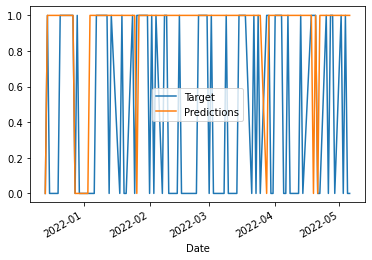

In [16]:
combined.plot()

In [17]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=1).fit(train[predictors], train['Target'])
log_pred = logreg.predict(test[predictors])
precision_score(test['Target'], log_pred)

0.47

In [18]:
from sklearn.metrics import classification_report
report_forest = classification_report(test['Target'], preds, zero_division=0)
report_logreg = classification_report(test['Target'], log_pred, zero_division=0)
print('Random Forest:\n', report_forest, '\nLogistic:\n', report_logreg)

Random Forest:
               precision    recall  f1-score   support

         0.0       0.60      0.11      0.19        53
         1.0       0.48      0.91      0.63        47

    accuracy                           0.49       100
   macro avg       0.54      0.51      0.41       100
weighted avg       0.54      0.49      0.40       100
 
Logistic:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        53
         1.0       0.47      1.00      0.64        47

    accuracy                           0.47       100
   macro avg       0.23      0.50      0.32       100
weighted avg       0.22      0.47      0.30       100



In [33]:

def backtest(data, model, predictors, start=1000, step=750):
    predictions = []
    for i in range(start, data.shape[0], step):
        train = data.iloc[:i].copy()
        test = data[i:(i+step)].copy()

        model.fit(train[predictors], train['Target'])
        pred = model.predict_proba(test[predictors])[:, 1]
        pred = pd.Series(pred, index=test.index)
        pred[pred > 0.6] = 1
        pred[pred <= 0.6] = 0

        combined = pd.concat({'Target': test['Target'], 'Predictions': pred}, axis=1)
        predictions.append(combined)
    return predictions


In [20]:
predictions.head(10)

,Target,Predictions
Date,,
1990-02-27,0.0,1.0
1990-02-28,1.0,1.0
1990-03-01,1.0,0.0
1990-03-02,1.0,1.0
1990-03-05,1.0,1.0
1990-03-06,0.0,1.0
1990-03-07,0.0,1.0
1990-03-08,1.0,0.0
1990-03-09,1.0,1.0


In [21]:
predictions['Predictions'].value_counts()

0.0    7550
1.0     562
Name: Predictions, dtype: int64

In [22]:
precision_score(predictions['Target'], predictions['Predictions'])

0.5177935943060499

In [24]:
print(classification_report(predictions['Target'], predictions['Predictions']))

              precision    recall  f1-score   support

         0.0       0.49      0.93      0.65      4001
         1.0       0.52      0.07      0.12      4111

    accuracy                           0.50      8112
   macro avg       0.51      0.50      0.39      8112
weighted avg       0.51      0.50      0.38      8112



In [29]:
weekly_mean = data.rolling(7).mean()
quarterly_mean = data.rolling(90).mean()
annual_mean = data.rolling(365).mean()
weekly_trend = data.shift(1).rolling(7).mean()["Target"]

In [30]:
data["weekly_mean"] = weekly_mean["Close"] / data["Close"]
data["quarterly_mean"] = quarterly_mean["Close"] / data["Close"]
data["annual_mean"] = annual_mean["Close"] / data["Close"]

data["annual_weekly_mean"] = data["annual_mean"] / data["weekly_mean"]
data["annual_quarterly_mean"] = data["annual_mean"] / data["quarterly_mean"]
data["weekly_trend"] = weekly_trend

data["open_close_ratio"] = data["Open"] / data["Close"]
data["high_close_ratio"] = data["High"] / data["Close"]
data["low_close_ratio"] = data["Low"] / data["Close"]

In [32]:
full_predictors = predictors + ["weekly_mean", "quarterly_mean", "annual_mean", "annual_weekly_mean", "annual_quarterly_mean", "open_close_ratio", "high_close_ratio", "low_close_ratio", "weekly_trend"]

In [34]:
predictions = backtest(data.iloc[365:], forest, full_predictors)

In [36]:
predictions = pd.concat(predictions)
precision_score(predictions['Target'], predictions['Predictions'])

0.5868544600938967

In [37]:
predictions['Predictions'].value_counts()

0.0    7534
1.0     213
Name: Predictions, dtype: int64